In [1]:
import nltk
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from string import digits
 # -*- coding: gbk -*-
import sys
from imp import reload
reload(sys)
import os
import os.path
import time

In [3]:
import pandas as pd
import numpy as np
import codecs
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from apyori import apriori

## 1.What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice

Because the source folder only contains txt files,so txt file content is the only variable we use in text mining analysis.  
During analysis,we will use frequency,terms as two variable to analyse.

In [31]:
filePaths=[]
fileContents=[]
for root,dirs,files in os.walk('txt/text-files-to-mine/'):
    for name in files:
        filePath=os.path.join(root,name)
        filePaths.append(filePath)
        f=codecs.open(filePath,'r','utf-8')
        fileContent=f.read()
        f.close()
        fileContents.append(fileContent)

import pandas
df=pandas.DataFrame({
    'fileContent':fileContents
})
rs = 42

In [11]:
df

,fileContent
0,Claxton hunting first major medal\n\nBritish h...
1,O'Sullivan could run in Worlds\n\nSonia O'Sull...
2,Greene sets sights on world title\n\nMaurice G...
3,IAAF launches fight against drugs\n\nThe IAAF ...
4,"Dibaba breaks 5,000m world record\n\nEthiopia'..."
5,Isinbayeva claims new world best\n\nPole vault...
6,O'Sullivan commits to Dublin race\n\nSonia O'S...
7,Hansen 'delays return until 2006'\n\nBritish t...
8,Off-colour Gardener storms to win\n\nBritain's...
9,Collins to compete in Birmingham\n\nWorld and ...


## 2.Can you identify data quality issues in order to perform text mining

There are 200 different txt files inside the source folder,so firstly we need to put all the txt file inside dataframe for further analysis,then i found that this txt files contains lots of unnecessary characters like digits,sapce and punctuation,so we remove all this useless charater and make all the other characters low case for analysing.
Secondly,too manys stopwords need to be deleted like 'he','she' and 'it' to improve accuracy.
Finally lemmatizer is used to make the words to their basic format.

In [32]:

# initialise WordNet lemmatizer and punctuation filter
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)

# join provided stopwords with the default NLTK English stopwords
stopwords = set(sw.words('english'))
def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

In [33]:
def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            remove_digits = str.maketrans('', '', digits)
            token = token.translate(remove_digits)
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')
            

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tf idf vectoriser
tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
X = tfidf_vec.fit_transform(df['fileContent'])

# see the number of unique tokens produced by the vectorizer. Lots of them...
print(len(tfidf_vec.get_feature_names()))

34819


In [35]:
from sklearn.cluster import KMeans

# K means clustering using the term vector
kmeans = KMeans(n_clusters=7, random_state=rs).fit(X)

In [36]:
# function to visualise text cluster. Useful for the assignment too :)

def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    # -- Params --
    # cluster_centers: cluster centers of fitted/trained KMeans/other centroid-based clustering
    # terms: terms used for clustering
    # num_word: number of terms to show per cluster. Change as you please.
    
    # find features/terms closest to centroids
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster {}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :5]:
            print(terms[term_idx], end=', ')
        print()
        
# call it
visualise_text_cluster(kmeans.n_clusters, kmeans.cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster 0: cricket, sri, icc, sri lanka, lanka, 
Top terms for cluster 1: club, want, liverpool, £, say, 
Top terms for cluster 2: pakistan, wicket, test, ball, australia, 
Top terms for cluster 3: athens, olympic, world, year, open, 
Top terms for cluster 4: england, ireland, wale, scotland, nation, 
Top terms for cluster 5: say, play, game, win, player, 
Top terms for cluster 6: cross country, chepkemei, country, cross, marathon, 


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# creating tf-idf terms - a bit slow, do it occasionaly
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(df['fileContent'])
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(df)

 --- Least Useful Terms --- 
Frequency descending :
say  Term Frequency 168
year  Term Frequency 134
game  Term Frequency 106
win  Term Frequency 102
play  Term Frequency 104
one  Term Frequency 104
go  Term Frequency 112
take  Term Frequency 112
england  Term Frequency 52
two  Term Frequency 103
------------------
Frequency Ascending :
mate mine  Term Frequency 1
mine shaun  Term Frequency 1
shaun threat  Term Frequency 1
threat play  Term Frequency 1
position also  Term Frequency 1
also play  Term Frequency 1
position believe  Term Frequency 1
still england  Term Frequency 1
team believe  Term Frequency 1
believe england  Term Frequency 1


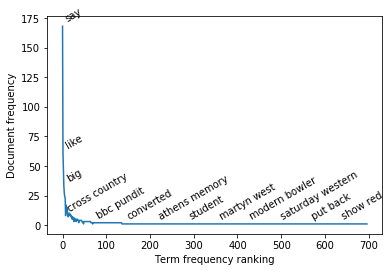

In [56]:
# visualisation of ZIPF law
def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    print(" --- Least Useful Terms --- ")
    print("Frequency descending :")
    for term in terms[0:10]:
        print(term['term'],  " Term Frequency", term['df'])
    print("------------------")
    print("Frequency Ascending :")
    leng = len(terms) - 1
    for term in terms[(leng - 10):leng]:
        print(term['term'], " Term Frequency", term['df'])
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
    
visualise_zipf(terms)

## 3.Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose. 


So we can find 10 least useful items from both the high end terms and low end terms.
#### Frequency descending :
* say  168 
* year  134 
* game   106 
* win  102 
* play  104 
#### Frequency Ascending : 
* mate mine  1 
* mine shaun  1 
* shaun threat  1 
* threat play  1 
* position also  1 

In [57]:
# another tf idf vectoriser
# limit the terms produced to terms that occured in min of 2 documents and max 80% of all documents
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.8)
X_filter = filter_vec.fit_transform(df['fileContent'])

# see the number of unique tokens produced by the vectorizer. Reduced!
print(len(filter_vec.get_feature_names()))

6642


In [23]:
%%time
# K means clustering using the new term vector, time it for comparison to SVD
kmeans_fil = KMeans(n_clusters=7, random_state=rs).fit(X_filter)

Wall time: 1.69 s


In [24]:
visualise_text_cluster(kmeans_fil.n_clusters, kmeans_fil.cluster_centers_, filter_vec.get_feature_names())


Top terms for cluster 0: club, chelsea, game, play, player, 
Top terms for cluster 1: world, athens, athletics, year, olympic, 
Top terms for cluster 2: england, ireland, wale, nation, six nation, 
Top terms for cluster 3: roddick, cup, moya, spain, davis cup, 
Top terms for cluster 4: cricket, ball, england, wicket, day, 
Top terms for cluster 5: open, hewitt, win, federer, australian, 
Top terms for cluster 6: open, australian open, australian, capriati, clijsters, 


In [25]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)
X_trans = svd.fit_transform(X_filter)

In [26]:
# sort the components by largest weighted word
sorted_comp = svd.components_.argsort()[:, ::-1]
terms = filter_vec.get_feature_names()

# visualise word - concept/component relationships
for comp_num in range(10):
    print("Top terms in component #{}".format(comp_num), end=" ")
    for i in sorted_comp[comp_num, :5]:
        print(terms[i], end=", ")
    print()

Top terms in component #0 england, year, win, play, game, 
Top terms in component #1 open, roddick, australian open, australian, moya, 
Top terms in component #2 athens, athletics, chepkemei, race, marathon, 
Top terms in component #3 test, wicket, ball, pakistan, run, 
Top terms in component #4 ireland, wale, england, nation, six nation, 
Top terms in component #5 greek, drug, kenteris, iaaf, thanou, 
Top terms in component #6 arsenal, chelsea, henry, shot, ferguson, 
Top terms in component #7 roddick, moya, davis, davis cup, spain, 
Top terms in component #8 chepkemei, marathon, cross country, radcliffe, cross, 
Top terms in component #9 pakistan, moya, cup, australia, davis cup, 


In [27]:
%%time
# K-means clustering using LSA-transformed X
svd_kmeans = KMeans(n_clusters=7, random_state=rs).fit(X_trans)

Wall time: 151 ms


In [28]:
# transform cluster centers back to original feature space for visualisation
original_space_centroids = svd.inverse_transform(svd_kmeans.cluster_centers_)

# visualisation
visualise_text_cluster(svd_kmeans.n_clusters, original_space_centroids, filter_vec.get_feature_names())

Top terms for cluster 0: vaughan, england, south, south africa, africa, 
Top terms for cluster 1: england, game, rugby, ireland, cricket, 
Top terms for cluster 2: open, australian, australian open, play, win, 
Top terms for cluster 3: club, liverpool, want, £, benitez, 
Top terms for cluster 4: world, athens, race, athletics, year, 
Top terms for cluster 5: arsenal, chelsea, wenger, henry, ferguson, 
Top terms for cluster 6: roddick, moya, davis cup, davis, nadal, 
